In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
using JSON

cross_validation_best_key_Jul_AM = readall("../temp_files/cross_validation_best_key_Jul_AM.json")
cross_validation_best_key_Jul_AM = JSON.parse(cross_validation_best_key_Jul_AM)

cross_validation_best_key_Jul_MD = readall("../temp_files/cross_validation_best_key_Jul_MD.json")
cross_validation_best_key_Jul_MD = JSON.parse(cross_validation_best_key_Jul_MD)

cross_validation_best_key_Jul_PM = readall("../temp_files/cross_validation_best_key_Jul_PM.json")
cross_validation_best_key_Jul_PM = JSON.parse(cross_validation_best_key_Jul_PM)

cross_validation_best_key_Jul_NT = readall("../temp_files/cross_validation_best_key_Jul_NT.json")
cross_validation_best_key_Jul_NT = JSON.parse(cross_validation_best_key_Jul_NT)

cross_validation_best_key_Jul_weekend = readall("../temp_files/cross_validation_best_key_Jul_weekend.json")
cross_validation_best_key_Jul_weekend = JSON.parse(cross_validation_best_key_Jul_weekend)

"(5,2.5,10000.0,1)"

In [3]:
coeffs_dict_Jul_AM = readall("../temp_files/coeffs_dict_Jul_AM.json")
coeffs_dict_Jul_AM = JSON.parse(coeffs_dict_Jul_AM)

coeffs_dict_Jul_MD = readall("../temp_files/coeffs_dict_Jul_MD.json")
coeffs_dict_Jul_MD = JSON.parse(coeffs_dict_Jul_MD)

coeffs_dict_Jul_PM = readall("../temp_files/coeffs_dict_Jul_PM.json")
coeffs_dict_Jul_PM = JSON.parse(coeffs_dict_Jul_PM)

coeffs_dict_Jul_NT = readall("../temp_files/coeffs_dict_Jul_NT.json")
coeffs_dict_Jul_NT = JSON.parse(coeffs_dict_Jul_NT)

coeffs_dict_Jul_weekend = readall("../temp_files/coeffs_dict_Jul_weekend.json")
coeffs_dict_Jul_weekend = JSON.parse(coeffs_dict_Jul_weekend)


coeffs_best_Jul_AM = coeffs_dict_Jul_AM[cross_validation_best_key_Jul_AM]
coeffs_best_Jul_MD = coeffs_dict_Jul_MD[cross_validation_best_key_Jul_MD]
coeffs_best_Jul_PM = coeffs_dict_Jul_PM[cross_validation_best_key_Jul_PM]
coeffs_best_Jul_NT = coeffs_dict_Jul_NT[cross_validation_best_key_Jul_NT]
coeffs_best_Jul_weekend = coeffs_dict_Jul_weekend[cross_validation_best_key_Jul_weekend]

6-element Array{Any,1}:
  1.0        
  0.00633423 
  0.00162237 
  0.000494663
  5.96322e-5 
 -2.9654e-6  

INFO: Loading help data...


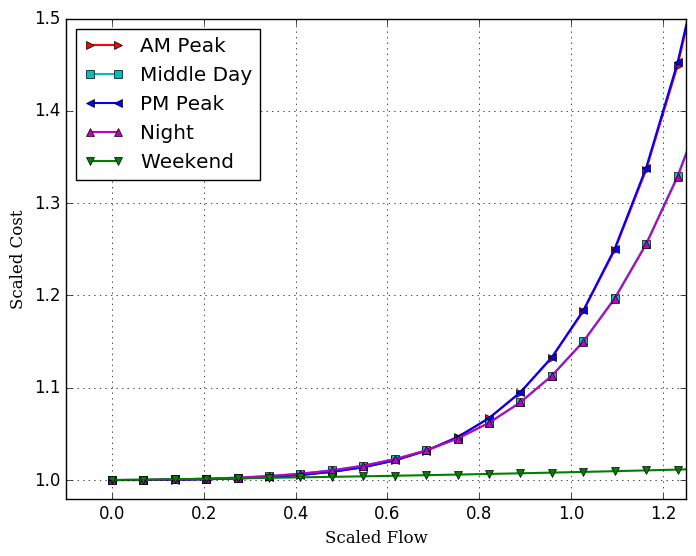

In [4]:
using PyPlot

xs = linspace(0, 1.3, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Jul_AM = map(x->polyEval(coeffs_best_Jul_AM, x), xs)
ys_Jul_MD = map(x->polyEval(coeffs_best_Jul_MD, x), xs)
ys_Jul_PM = map(x->polyEval(coeffs_best_Jul_PM, x), xs)
ys_Jul_NT = map(x->polyEval(coeffs_best_Jul_NT, x), xs)
ys_Jul_weekend = map(x->polyEval(coeffs_best_Jul_weekend, x), xs)

plot(xs, ys_Jul_AM, ">-r", label="AM Peak", linewidth=1.5)
plot(xs, ys_Jul_MD, "s-c", label="Middle Day", linewidth=1.5)
plot(xs, ys_Jul_PM, "<-b", label="PM Peak", linewidth=1.5)
plot(xs, ys_Jul_NT, "^-m", label="Night", linewidth=1.5)
plot(xs, ys_Jul_weekend, "v-g", label="Weekend", linewidth=1.5)

legend(loc="upper left") 

grid("on")
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = ["family"=>"serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Jul.pdf")

In [5]:
cross_validation_best_key_Jul_MD

"(7,0.5,1000.0,3)"

In [6]:
coeffs_best_Jul_AM

9-element Array{Any,1}:
  1.0       
 -0.00344067
  0.0567471 
 -0.196177  
  0.622468  
 -0.900772  
  0.940503  
 -0.466635  
  0.109029  

In [7]:
coeffs_best_Jul_MD

8-element Array{Any,1}:
  1.0       
  0.00108759
  0.0287137 
 -0.0315965 
  0.157745  
 -0.103907  
  0.100168  
 -0.0172884 

In [8]:
coeffs_best_Jul_PM

9-element Array{Any,1}:
  1.0       
 -0.00347186
  0.0567223 
 -0.196848  
  0.624653  
 -0.904773  
  0.945761  
 -0.469278  
  0.109827  

In [9]:
coeffs_best_Jul_NT

8-element Array{Any,1}:
  1.0       
  0.00114833
  0.028797  
 -0.0316211 
  0.157652  
 -0.104198  
  0.1001    
 -0.0173351 

In [10]:
coeffs_best_Jul_weekend

6-element Array{Any,1}:
  1.0        
  0.00633423 
  0.00162237 
  0.000494663
  5.96322e-5 
 -2.9654e-6  

In [11]:
outfile = open("../temp_files/cost_func_Jul.txt", "w")

write(outfile,"coeffs_Jul_AM: $(coeffs_best_Jul_AM) \n \
coeffs_Jul_MD: $(coeffs_best_Jul_MD) \n \
coeffs_Jul_PM: $(coeffs_best_Jul_PM) \n \
coeffs_Jul_NT: $(coeffs_best_Jul_NT) \n \
coeffs_Jul_weekend: $(coeffs_best_Jul_weekend) \n")

close(outfile)